In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your neural network architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (cancer or not)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'lung/Data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train the model
model.fit(train_generator, epochs=10)

# Save the trained model
model.save('lung_cancer_diagnosis_model.h5')


Found 620 images belonging to 4 classes.
Epoch 1/10
20/20 [==============================] - 56s 3s/step - loss: -10063.3887 - accuracy: 0.2000
Epoch 2/10
20/20 [==============================] - 51s 2s/step - loss: -913361.1250 - accuracy: 0.1919
Epoch 3/10
20/20 [==============================] - 51s 2s/step - loss: -13439040.0000 - accuracy: 0.1919
Epoch 4/10
20/20 [==============================] - 50s 2s/step - loss: -101484896.0000 - accuracy: 0.1919
Epoch 5/10
20/20 [==============================] - 50s 2s/step - loss: -473911488.0000 - accuracy: 0.1919
Epoch 6/10
20/20 [==============================] - 51s 2s/step - loss: -1703282944.0000 - accuracy: 0.1919
Epoch 7/10
20/20 [==============================] - 50s 2s/step - loss: -5048287744.0000 - accuracy: 0.1919
Epoch 8/10
20/20 [==============================] - 50s 2s/step - loss: -12424438784.0000 - accuracy: 0.1919
Epoch 9/10
20/20 [==============================] - 50s 2s/step - loss: -29001900032.0000 - accuracy: 0.191

Enter the image path to predict lung1.jpg


1/1 [==============================] - 0s 280ms/step
[1.]
Cancer


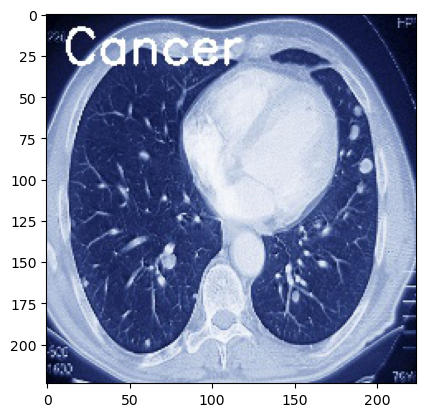

In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Load the trained model
model = load_model('lung_cancer_diagnosis_model.h5')

# Function to preprocess the input image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize the pixel values
    return image

# Function to predict the diagnosis and show the segmented image
def predict_and_visualize(image_path):
    preprocessed_image = preprocess_image(image_path)
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

    prediction = model.predict(preprocessed_image)[0]
    if prediction >= 0.8:
        diagnosis = "Cancer"
    else:
        diagnosis = "Non-Cancer"
    print(prediction)    
    print(diagnosis)    

    segmented_image = preprocessed_image[0] * 255  # Convert back to 0-255 range

    cv2.putText(segmented_image, diagnosis, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

   
    cv2.imwrite('segmented_image.jpg', segmented_image)
    

# Take input image from the user
input_image_path = input("Enter the image path to predict")

# Call the function to predict and visualize
predict_and_visualize(input_image_path)
image = mpimg.imread("segmented_image.jpg")
plt.imshow(image)
plt.show()